# **Universidad ICESI**

*Milton Orlando Sarria*

----
# Regresión logística

La regresión logística es un algoritmo fundamental en machine learning para resolver problemas de clasificación binaria. Antes de introducirla formalmente, es clave entender por qué la regresión lineal no es adecuada para este tipo de tareas.  

---

## **1. Problema de Clasificación**  

En clasificación, el objetivo es asignar etiquetas discretas a los datos. Por ejemplo:  

- **Detección de spam**: Un correo puede ser **spam (1)** o **no spam (0)**.  
- **Diagnóstico médico**: Un paciente puede estar **enfermo (1)** o **sano (0)**.  
- **Reconocimiento de imágenes**: Una imagen puede contener **un gato (1)** o **no contenerlo (0)**.  

Dado un conjunto de datos con características \(\mathbf{x}\), queremos predecir la probabilidad de pertenecer a una clase.

---

## **2. ¿Por qué la Regresión Lineal No Es Suficiente?**  

Podríamos pensar en usar **regresión lineal** para clasificación, es decir, modelar la probabilidad de pertenecer a la clase $1$ como:  

$
h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$

Sin embargo, esto tiene problemas:  

1. **Salida sin restricciones**: La regresión lineal puede generar valores fuera del rango $[0,1]$, lo cual no es válido para probabilidades.  
2. **Mala interpretación**: No es intuitivo interpretar una salida negativa o mayor que 1 como probabilidad.  
3. **Sensibilidad a valores atípicos**: Un solo dato extremo puede afectar mucho la predicción.  

Veamos esto en código.  


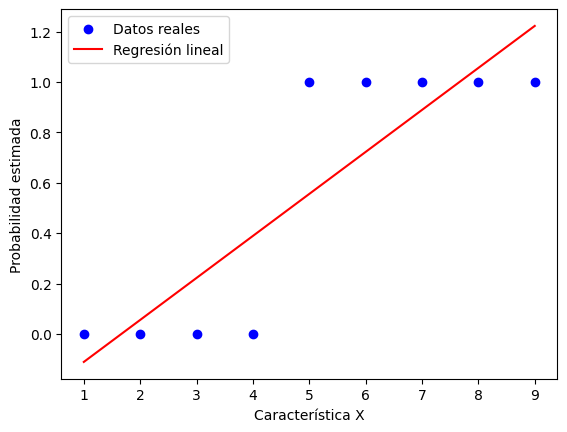

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos simulados (característica X y etiqueta Y)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])  # Etiquetas binarias

# Entrenar regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Graficar resultados
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel("Característica X")
plt.ylabel("Probabilidad estimada")
plt.legend()
plt.show()

🔴 **Problema:** La línea roja predice valores fuera del rango \([0,1]\), lo que es incorrecto para probabilidades.


---

### **¿Por qué no usamos la función signo $(\text{sign}(z)$) en clasificación?**  

Usualmente usamos la notación $z$, se le conoce como score, y representa la evaluación de la función lineal $h(x)$.
Una posible alternativa a la regresión logística sería usar la **función signo** para clasificar directamente los datos:  

$
\text{sign}(z) =
\begin{cases} 
1 & \text{si } z \geq 0 \\ 
-1 & \text{si } z < 0 
\end{cases}
$

En términos de clasificación binaria ($0,1$), podríamos redefinirla como:

$
\text{sign}(z) =
\begin{cases} 
1 & \text{si } z \geq k \\ 
0 & \text{si } z < k 
\end{cases}
$

Donde $k$ representa un umbral de desición.

🔴 **Problema:** Aunque esta función efectivamente separa los datos en dos clases, **no es derivable en \(z=0\)**. Esto es un gran problema porque los algoritmos de optimización (como el **gradiente descendente**) necesitan derivadas para actualizar los parámetros $\theta$.  

---

### **Ejemplo en Python: Uso de la Función Signo**  



Text(0.5, 1.0, 'Función Signo')

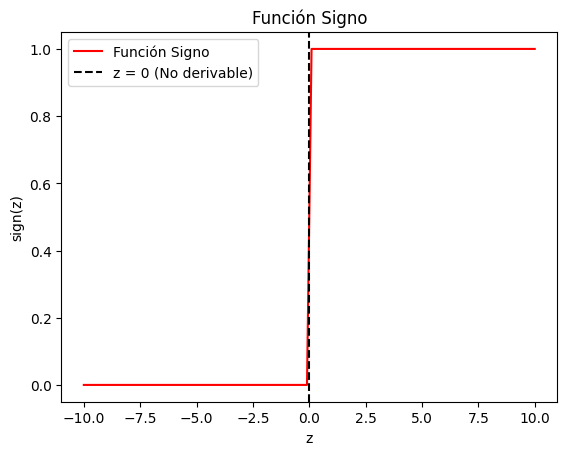

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función signo
def sign_function(z):
    return np.where(z >= 0, 1, 0)

# Generar valores para visualizar la función
z = np.linspace(-10, 10, 100)
y_sign = sign_function(z)

# Graficar
plt.plot(z, y_sign, label='Función Signo', color='red')
plt.axvline(0, color='black', linestyle='--', label='z = 0 (No derivable)')
plt.xlabel("z")
plt.ylabel("sign(z)")
plt.legend()
plt.title("Función Signo")


### **¿Por qué es un problema que no sea derivable?**  

Si intentamos calcular la derivada de la función signo:  

- Para $ z > 0 $, la función es constante ($1$), por lo que su derivada es $(0$.  
- Para $ z < 0$, la función es constante ($0$), por lo que su derivada también es $0$.  
- En $ z = 0$, la función **salta bruscamente** de $0$ a $1$, por lo que **no existe una derivada bien definida**.  

Esto significa que **no podemos calcular gradientes** para optimizar los parámetros $\theta$ usando gradiente descendente.  

---
💡 Aunque la función signo separa bien las clases, su falta de derivabilidad la hace inútil para entrenar modelos con optimización basada en gradientes.


## **3. Introducción a la Regresión Logística**  

Para resolver estos problemas, en lugar de modelar $ h(x) $ de forma lineal, aplicamos una **función sigmoide** a la salida de la regresión lineal:  

$
h(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)
$

donde la función sigmoide es:

$
g(z) = \frac{1}{1 + e^{-z}}
$

Esta función **comprime** la salida a un valor entre $0$ y $1$, lo que la hace ideal para modelar probabilidades.  

### **Ejemplo: Implementación de la Función Sigmoide**  


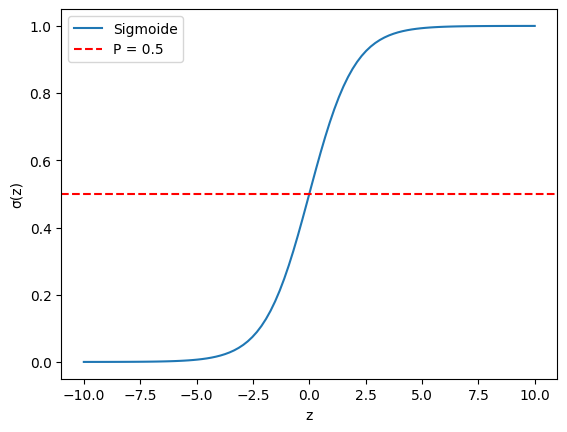

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualizar la función sigmoide
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), label='Sigmoide')
plt.axhline(0.5, color='red', linestyle='--', label='P = 0.5')
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.show()


$
g(z) = \frac{1}{1 + e^{-\alpha\cdot z+\beta}}
$

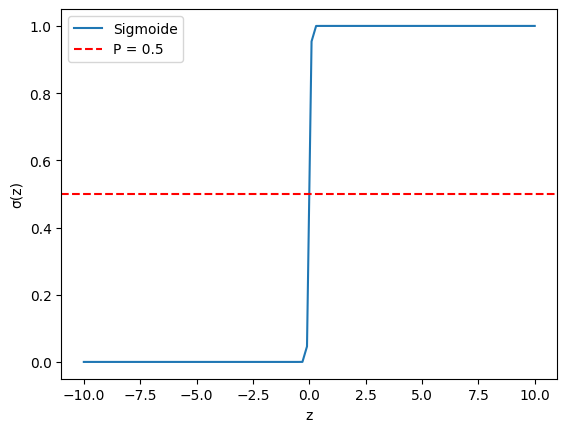

In [10]:
def sigmoid(z,a=1,b=0):
    return 1 / (1 + np.exp(-a*z+b))

# Visualizar la función sigmoide
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z,30,0), label='Sigmoide')
plt.axhline(0.5, color='red', linestyle='--', label='P = 0.5')
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.show()

📌La función sigmoide asegura que la salida sea siempre entre $0$ y $1$, convirtiéndola en una probabilidad.

---

## **4. Construcción de la Función Objetivo**  

En regresión logística, en lugar de minimizar el **error cuadrático medio** como en regresión lineal, usamos la **función de verosimilitud** basada en la probabilidad de observar los datos dados los parámetros $\theta$.

Dado un conjunto de entrenamiento con $ m $ ejemplos $(x^{(i)}, y^{(i)})$, definimos la probabilidad condicional de $ y $ dado $ x $ como:

$
P(y=1 | x) = h(x) = g(\theta^T x)
$

$
P(y=0 | x) = 1 - h(x)
$

La función de verosimilitud (probabilidad conjunta de todas las muestras) es:

$
L(\theta) = \prod_{i=1}^{m} h(x^{(i)})^{y^{(i)}} (1 - h(x^{(i)}))^{(1 - y^{(i)})}
$

Tomamos el **logaritmo** para simplificar cálculos y definir la **función de costo** (log-verosimilitud negativa):

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h(x^{(i)}) + (1 - y^{(i)}) \log(1 - h(x^{(i)})) \right]
$

🔷 Esta función se conoce como **entropía cruzada**, y mide qué tan bien nuestro modelo se ajusta a los datos.

---

La función de máxima verosimilitud (MLE, por sus siglas en inglés) busca encontrar los parámetros de un modelo estadístico que hagan más probable que los datos observados hayan ocurrido bajo ese modelo. La razón por la cual esta función se expresa como el producto de las probabilidades de ocurrencia de cada etiqueta (o clase) dados los datos de entrada y los parámetros del modelo, se puede entender desde el punto de vista de la probabilidad condicional.

### Explicación paso a paso:

1. **Probabilidad condicional**: 
   La idea central de la verosimilitud es estimar qué tan probable es observar un conjunto de datos dado un conjunto de parámetros del modelo. Supongamos que tenemos un conjunto de datos de entrenamiento que consiste en un conjunto de entradas $ X = \{x_1, x_2, \dots, x_n\} $ y sus correspondientes etiquetas $ Y = \{y_1, y_2, \dots, y_n\} $. Para cada entrada $ x_i $, queremos calcular la probabilidad condicional $ P(y_i | x_i, \theta) $, donde $ \theta $ son los parámetros del modelo.

2. **Independencia de las observaciones**: 
   Si asumimos que las observaciones son independientes entre sí (un supuesto común en muchos modelos estadísticos), la probabilidad conjunta de observar todas las etiquetas dadas las entradas y los parámetros del modelo, es el producto de las probabilidades individuales:
   $
   P(Y | X, \theta) = \prod_{i=1}^{n} P(y_i | x_i, \theta)
   $
   Esto quiere decir que la probabilidad de que todas las etiquetas hayan ocurrido es el producto de las probabilidades de que cada etiqueta \( y_i \) haya ocurrido dada la entrada $ x_i$ y los parámetros $ \theta$.

3. **Máxima verosimilitud**:
   La función de verosimilitud es la probabilidad de observar los datos (entradas y etiquetas) dados los parámetros del modelo:
   $
   L(\theta | X, Y) = P(Y | X, \theta) = \prod_{i=1}^{n} P(y_i | x_i, \theta)
   $
   Esta es la función de verosimilitud que queremos maximizar para encontrar los mejores parámetros \( \theta \).

4. **Logaritmo de la verosimilitud**:
   Para hacer más manejable la maximización de la verosimilitud (ya que los productos de probabilidades pueden ser muy pequeños), se toma el logaritmo de la función de verosimilitud. Esto convierte el producto en una suma:
   $
   \log L(\theta | X, Y) = \sum_{i=1}^{n} \log P(y_i | x_i, \theta)
  $
   Maximizar la función de log-verosimilitud es equivalente a maximizar la función de verosimilitud, ya que el logaritmo es una función monótonamente creciente.

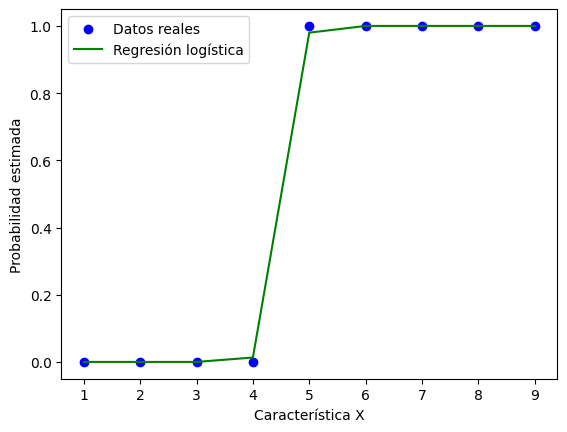

In [11]:
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')
# Función de costo J()
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradiente de J()
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1/m) * (X.T @ (h - y))

# Datos simulados
X = np.c_[np.ones((9, 1)), X]  # Agregar columna de 1s para 
theta_init = np.zeros(X.shape[1])

# Optimización con gradiente descendente
result = minimize(fun=cost_function, x0=theta_init, args=(X, y), jac=gradient, method='TNC')
theta_opt = result.x

# Predicción
y_pred_logistic = sigmoid(X @ theta_opt)

# Graficar
plt.scatter(X[:,1], y, color='blue', label='Datos reales')
plt.plot(X[:,1], y_pred_logistic, color='green', label='Regresión logística')
plt.xlabel("Característica X")
plt.ylabel("Probabilidad estimada")
plt.legend()
plt.show()

✅ **Ventajas de Regresión Logística:**  
✔ Salida entre 0 y 1 (probabilidad).  
✔ Función de costo bien definida.  
✔ Interpretación probabilística clara.  

---

📌 **Siguientes pasos:** Experimentar con conjuntos de datos más complejos y aprender sobre regularización (L1, L2) para mejorar la generalización. 🚀


# Regresión logística empleando dos variables independientes

En el caso de la regresión logística con dos variables predictoras, la relación entre las variables independientes $x_1$ y $x_2$ y la probabilidad de la variable dependiente $y$ se modela mediante la siguiente función lineal:

$
h(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2
$

Donde:
- $h(x)$ es la combinación lineal de las variables $x_1$ y $x_2$.
- $\theta_0$ es el término independiente o intercepto.
- $\theta_1$ y $\theta_2$ son los coeficientes que representan las contribuciones de $x_1$ y $x_2$ respectivamente.

Dado que $h(x)$ es una función lineal, su salida puede tomar cualquier valor real, pero en la regresión logística, necesitamos que el resultado esté en el rango [0, 1] para representar una probabilidad. Por eso, se aplica la función sigmoide a $h(x)$, que convierte la salida en una probabilidad:

$
g(h(x)) = \frac{1}{1 + e^{-h(x)}}
$

Esta función sigmoide asegura que la salida sea siempre un valor entre 0 y 1, lo que permite interpretarla como una probabilidad. La función se simplifica de la siguiente forma:

$
g(z) = \frac{1}{1 + e^{-z}}
$

Donde $z$ se le conoce como score y representa la función lineal $h(x)$.

**Finalmente. La salida del modelo, es decir, la predicción $\hat{y}$, es la función de hipótesis:**

$
\hat{y} = g(z) = g(\theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2)
$


### Función de Costo en la Regresión Logística

La función de costo utilizada en la regresión logística es diferente de la usada en la regresión lineal. Para la regresión logística, se emplea la **función de costo de entropía cruzada** (o log loss), que mide la diferencia entre las probabilidades predichas y las etiquetas reales.

La función de costo se define como:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right]
$

Donde:
- $m$ es el número total de ejemplos en el conjunto de datos.
- $y^{(i)}$ es el valor real de la etiqueta para el $i$-ésimo ejemplo.
- $g(z^{(i)})$ que por simplicidad representa $g(h(x^{(i)}))$ es la probabilidad predicha por el modelo para el $i$-ésimo ejemplo.

El objetivo de la regresión logística es encontrar los valores óptimos de $\theta_0$, $\theta_1$ y $\theta_2$ que minimicen esta función de costo. Al hacerlo, el modelo ajusta sus predicciones para que las probabilidades calculadas se alineen lo más posible con las etiquetas reales, lo que mejora la precisión de la clasificación.

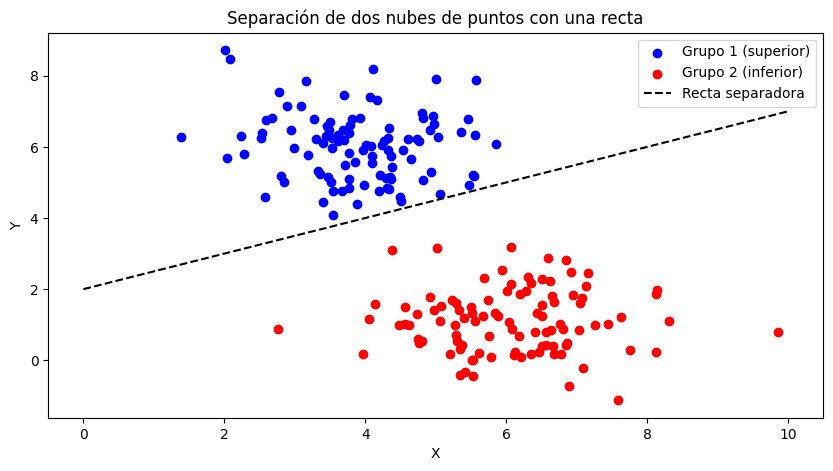

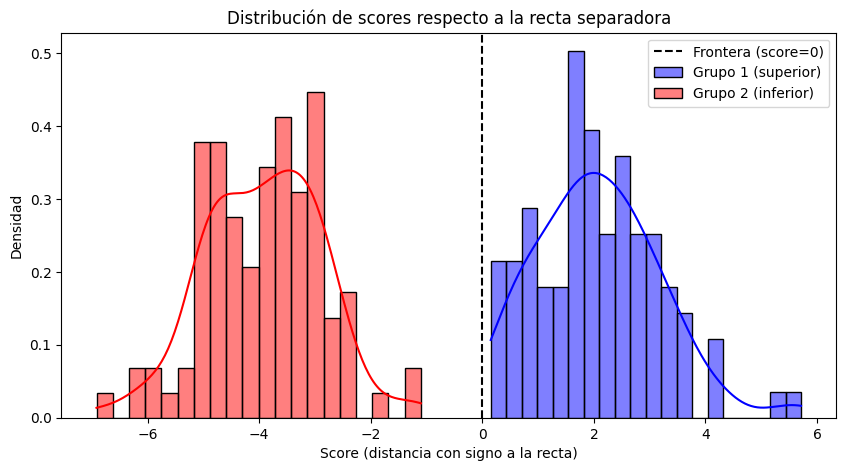

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros de la recta separadora: y = mx + b
m = 0.5  # Pendiente
b = 2    # Intersección con el eje y

# Generar datos para dos nubes de puntos
np.random.seed(42)
x1 = np.random.randn(100)+4
y1 = np.random.randn(100)+6  # Nube por encima de la recta

x2 = np.random.randn(100)+6
y2 = np.random.randn(100)+1   # Nube por debajo de la recta

# Función para calcular el score (distancia con signo a la recta)
def score(x, y, m, b):
    return y - (m * x + b)

# Calcular los scores para cada punto
scores1 = score(x1, y1, m, b)
scores2 = score(x2, y2, m, b)

# Graficar las nubes de puntos y la recta separadora
plt.figure(figsize=(10, 5))
plt.scatter(x1, y1, color='blue', label="Grupo 1 (superior)")
plt.scatter(x2, y2, color='red', label="Grupo 2 (inferior)")

x_vals = np.linspace(0, 10, 100)
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, 'k--', label="Recta separadora")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Separación de dos nubes de puntos con una recta")
plt.show()

# Histograma con línea de densidad de los scores
plt.figure(figsize=(10, 5))
sns.histplot(scores1, color="blue", kde=True, label="Grupo 1 (superior)", stat="density", bins=20)
sns.histplot(scores2, color="red", kde=True, label="Grupo 2 (inferior)", stat="density", bins=20)
plt.axvline(0, color='black', linestyle="--", label="Frontera (score=0)")

plt.xlabel("Score (distancia con signo a la recta)")
plt.ylabel("Densidad")
plt.legend()
plt.title("Distribución de scores respecto a la recta separadora")
plt.show()



### Paso 1: Generar un Conjunto de Datos Sencillo

Primero, vamos a crear un conjunto de datos sintético en dos dimensiones.


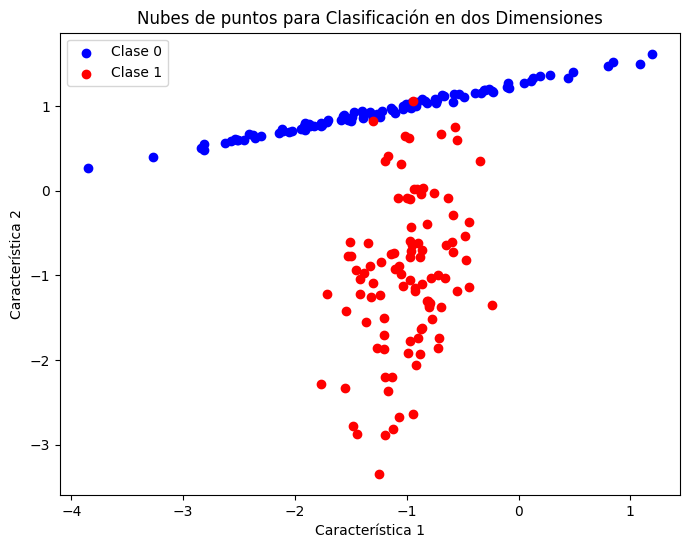

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generar datos de clasificación
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=10)

# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Nubes de puntos para Clasificación en dos Dimensiones')
plt.legend()
plt.show()

### Paso 2: Inicializar los Parámetros

Inicializamos los parámetros $\theta_0$, $\theta_1$ y $\theta_2$ con valores iniciales.


In [22]:
# Inicializar parámetros de forma aleatoria
np.random.seed(0)
theta_0 = np.random.randn(1)[0]
theta_1 = np.random.randn(1)[0]
theta_2 = np.random.randn(1)[0]
# Definir la tasa de aprendizaje y el número de iteraciones
learning_rate = 0.1
n_iterations = 1000


print(f"Parámetros iniciales: \ntheta_0 = {theta_0}, \ntheta_1 = {theta_1}, \ntheta_2 = {theta_2}")

Parámetros iniciales: 
theta_0 = 1.764052345967664, 
theta_1 = 0.4001572083672233, 
theta_2 = 0.9787379841057392



### Paso 3: Implementar la Función Sigmoide y la Función de Costo

La función sigmoide es esencial para la regresión logística, ya que convierte la salida de la función lineal a una probabilidad entre 0 y 1.

$
g(z) = \frac{1}{1 + e^{-z}}
$

La función de costo para la regresión logística es la función de entropía cruzada:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right]
$


In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, theta_0, theta_1, theta_2):
    return sigmoid(theta_0 + theta_1 * X[:, 0] + theta_2 * X[:, 1])

def cost_function(X, y, theta_0, theta_1, theta_2):
    m = len(y)
    g = hypothesis(X, theta_0, theta_1, theta_2)
    return -(1/m) * np.sum(y * np.log(g) + (1 - y) * np.log(1 - g))

## Visualizar datos con parámetros iniciales del modelo

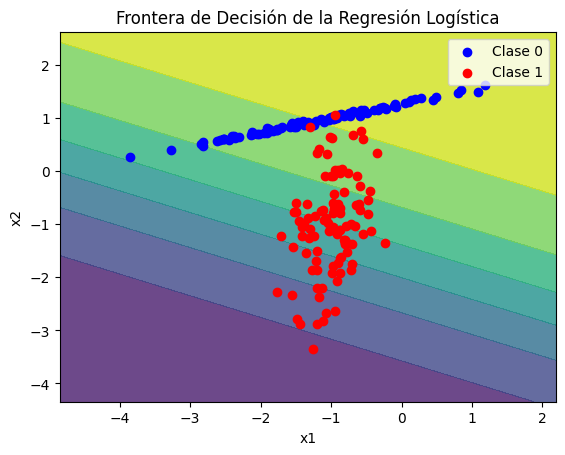

In [23]:
# Generar una malla de puntos
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

# Calcular la frontera de decisión
Z = hypothesis(np.c_[xx1.ravel(), xx2.ravel()], theta_0, theta_1, theta_2)
Z = Z.reshape(xx1.shape)

# Visualizar la frontera de decisión y los datos
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontera de Decisión de la Regresión Logística')
plt.legend()
plt.show()

###  Derivación del Gradiente

Para encontrar la actualización de los parámetros $ \theta_j $ (donde $ j = 0, 1, 2 $), necesitamos calcular la derivada parcial de la función de costo con respecto a cada $ \theta_j $.

$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \left( -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right] \right)
$

Consideremos primero la derivada de la función de costo respecto a $ \theta_j$. Para simplificar, derivamos para un solo ejemplo $ i $:

$
\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \frac{\partial}{\partial \theta_j} \log(g(z^{(i)})) + (1 - y^{(i)}) \frac{\partial}{\partial \theta_j} \log(1 - g(z^{(i)})) \right]
$

La derivada de la función log-sigmoide es:

$
\frac{\partial \log(g(z^{(i)}))}{\partial \theta_j} = \frac{1}{g(z^{(i)})} \cdot \frac{\partial g(z^{(i)})}{\partial \theta_j}
$

La derivada de la función sigmoide \( g(z) \) respecto a \( z \) es:

$
\frac{\partial g(z)}{\partial z} = g(z) \cdot (1 - g(z))
$

Entonces:

$
\frac{\partial g(z^{(i)})}{\partial \theta_j} = g(z^{(i)}) \cdot (1 - g(z^{(i)})) \cdot x_j^{(i)}
$

Por lo tanto, la derivada de la función de costo con respecto a $ \theta_j $ es:

$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( g(z^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

### Fórmula de Actualización de Parámetros

Finalmente, en el algoritmo de gradiente descendente, los parámetros \( \theta_j \) se actualizan usando la siguiente fórmula:

$
\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$

Sustituyendo la derivada obtenida:

$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( g(z^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

Donde $ \alpha $ es la tasa de aprendizaje.



### Paso 4: Implementar el Algoritmo de Gradiente Descendente

El gradiente descendente ajusta los parámetros $\theta_0$, $\theta_1$, y $\theta_2$ para minimizar la función de costo.

$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( g(z^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

In [24]:
# Listas para almacenar el historial de costos y parámetros
cost_history = []
theta_0_history = []
theta_1_history = []
theta_2_history = []

# Algoritmo de gradiente descendente
for _ in range(n_iterations):
    # Calcular las predicciones
    g = hypothesis(X, theta_0, theta_1, theta_2)
    
    # Calcular gradientes
    d_theta_0 = (1/len(y)) * np.sum(g - y)
    d_theta_1 = (1/len(y)) * np.sum((g - y) * X[:, 0])
    d_theta_2 = (1/len(y)) * np.sum((g - y) * X[:, 1])
    
    # Actualizar los parámetros
    theta_0 -= learning_rate * d_theta_0
    theta_1 -= learning_rate * d_theta_1
    theta_2 -= learning_rate * d_theta_2
    
    # Almacenar el costo y los parámetros en cada iteración
    cost = cost_function(X, y, theta_0, theta_1, theta_2)
    cost_history.append(cost)
    theta_0_history.append(theta_0)
    theta_1_history.append(theta_1)
    theta_2_history.append(theta_2)

# Mostrar los parámetros finales
print(f"Parámetros finales: theta_0 = {theta_0}, theta_1 = {theta_1}, theta_2 = {theta_2}")

Parámetros finales: theta_0 = 2.382670852764288, theta_1 = 0.960604238621245, theta_2 = -4.032750912863459


### Paso 5: Visualizar la Evolución de la Función de Costo

Visualizamos cómo la función de costo disminuye a lo largo de las iteraciones, lo que indica la convergencia del modelo.

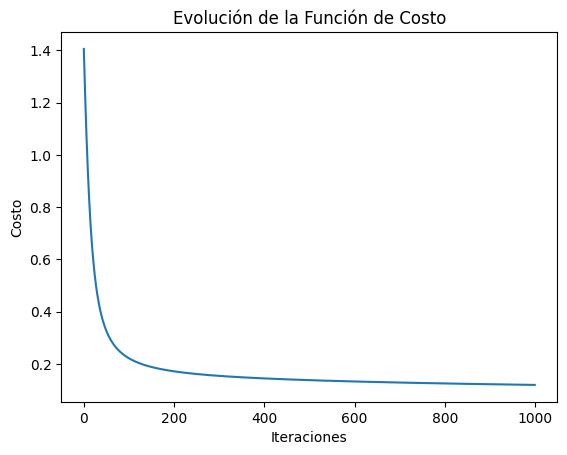

In [25]:
# Visualizar la evolución de la función de costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución de la Función de Costo')
plt.show()

### Paso 6: Visualizar la Frontera de Decisión

Finalmente, visualizamos la frontera de decisión generada por el modelo para separar las dos clases.


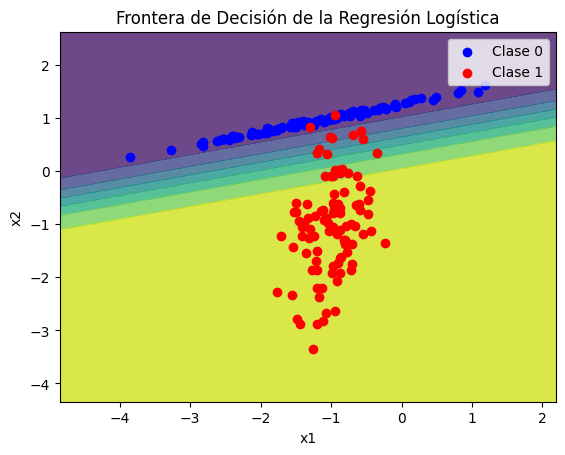

In [26]:
# Generar una malla de puntos
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

# Calcular la frontera de decisión
Z = hypothesis(np.c_[xx1.ravel(), xx2.ravel()], theta_0, theta_1, theta_2)
Z = Z.reshape(xx1.shape)

# Visualizar la frontera de decisión y los datos
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontera de Decisión de la Regresión Logística')
plt.legend()
plt.show()